In [ ]:
from map_elites import EliteMatrix
from matplotlib import pyplot as plt
import numpy as np

In [142]:
def plot_3d_in_2d(matrix):
    """Plot 3d matrix in a 2d plane

    Args:
        matrix (np.ndarray): [description]
    """
    from mpl_toolkits.axes_grid1 import AxesGrid
    min_value = np.min(matrix[matrix!=0])
    num_ax = matrix.shape[0]
    fig = plt.figure(dpi=200)
    grid = AxesGrid(fig, 111,
                nrows_ncols=(1, num_ax),
                axes_pad=0.05,
                share_all=True,
                label_mode="L",
                cbar_location="right",
                cbar_mode="single",
                )
    for i, ax in enumerate(grid):
        im = ax.imshow(matrix[i], vmin=min_value-0.05, vmax=matrix.max(), cmap='plasma')
    grid.cbar_axes[0].colorbar(im)
    # for cax in grid.cbar_axes:
    #     cax.toggle_label(False)
    plt.show()

def plot_4d_in_2d(matrix, save=False, save_name="default", vmin=None, vmax=None):
    """Plot 3d matrix in a 2d plane

    Args:
        matrix (np.ndarray): [description]
    """
    from mpl_toolkits.axes_grid1 import AxesGrid
    vmin = np.min(matrix[matrix!=0]) - 0.05 if vmin is None else vmin
    vmax = matrix.max() if vmax is None else vmax
    num_ax_1 = matrix.shape[0]
    num_ax_2 = matrix.shape[1]
    fig = plt.figure(dpi=200)
    grid = AxesGrid(fig, 111,
                nrows_ncols=(num_ax_1, num_ax_2),
                axes_pad=0.05,
                share_all=True,
                label_mode="L",
                cbar_location="right",
                cbar_mode="single",
                )
    for i, ax in enumerate(grid):
        j = i % num_ax_2
        i = i // num_ax_2
        im = ax.imshow(matrix[i, j], vmin=vmin, vmax=vmax, cmap='plasma')
    grid.cbar_axes[0].colorbar(im)
    # for cax in grid.cbar_axes:
    #     cax.toggle_label(False)
    if save:
        plt.savefig(save_name, dpi=200)
    plt.show()

In [ ]:
MX = EliteMatrix.load('Elites3d/nasbench_gt_FashionMNIST.npy')

In [ ]:
MX.elites[0,0,0].keys()

In [ ]:
plot_3d_in_2d(MX.get_performance())

In [ ]:
plot_3d_in_2d(MX.get_performance('FashionMNIST'))

In [167]:
budget = 90
topk_list = []
for idx, x in MX.sorted_iter():
    print(x['validation_accuracy'], x['FashionMNIST'], idx)
    topk_list.append(x['FashionMNIST'])
    budget = budget - 1
    if budget <= 0:
        break

[0.9505542318026224, 0.9475828011830648, 0.9473824898401896, 0.9472489356994629, 0.9471821586290995, 0.947082002957662, 0.9465811848640442, 0.9460803866386414, 0.9460136294364929, 0.945846696694692, 0.945846696694692, 0.9455795884132385, 0.9453125, 0.9452791213989258, 0.944945236047109, 0.9445779919624329, 0.9442441066106161, 0.9442107280095419, 0.9441773295402527, 0.9441105723381042, 0.94407719373703, 0.9439102411270142, 0.9437433083852133, 0.9436097542444865, 0.943542997042338, 0.9433426856994629, 0.9432425300280253, 0.943008820215861, 0.9424412250518799, 0.9419738252957662, 0.9417067170143127, 0.9414396286010742, 0.9414396286010742, 0.94140625, 0.9410390059153239, 0.9408052762349447, 0.9406049648920695, 0.9402710994084676, 0.9400039911270142, 0.9397035439809164, 0.9397035241127014, 0.9394698143005371, 0.9393362800280253, 0.9391693274180094, 0.9391359289487203, 0.9390023946762085, 0.9388020833333334, 0.9387019077936808, 0.9387019077936808, 0.9385683735211691, 0.9383680621782938, 0.93

In [168]:
m = EliteMatrix.load('Elites3d/nasbench_gt_FashionMNIST.npy')
budget = 20
ALPHA1 = 2
ALPHA2 = 2
# do initialization
# for idx, x in m.iter():
#     m.elites['new_metric'] = m.elites['validation_accuracy']

sample_list = []
moving_average = []
cur_acc_map = m.get_performance(key='validation_accuracy')
average_performance = np.mean(cur_acc_map)
for i in range(budget):
    pm = np.where(cur_acc_map == np.amax(cur_acc_map))
    # print(pm)
    cur_idx = tuple(np.array(pm).flatten().tolist())
    # print(idx)
    performance = m.get_performance(key='FashionMNIST')[cur_idx]
    moving_average.append(performance)
    sample_list.append((m.elites[cur_idx], performance, cur_idx))
    print(f"Iter {i}: {performance} {cur_idx} {np.mean(moving_average)}")
    cur_acc_map = m.get_performance(key='validation_accuracy')
    for elite, performance, idx in sample_list:
        # print(performance, np.mean(moving_average))
        # print(idx, performance)
        supress_ratio = performance / np.mean(moving_average)
        if supress_ratio > 1:
            ALPHA = ALPHA1
        else:
            ALPHA = ALPHA2
        for dx, dy, dz in [(0, -1, 0), (0, 1, 0), (1, 0, 0), (-1, 0, 0)]:
        # for dx in [-1, 0, 1]:
        #     for dy in [-1, 0, 1]:
        #         for dz in [-1, 0, 1]:
            x = dx + idx[0]
            y = dy + idx[1]
            z = dz + idx[2]
            if x >=0 and x < cur_acc_map.shape[0] and y >=0 and y < cur_acc_map.shape[1]: 
                # print(x, y, z, cur_acc_map[x, y, z] , '*' , (1 - supress_ratio ** ALPHA), " -> ", end="")
                cur_acc_map[x, y, z] = cur_acc_map[x, y, z] - average_performance * (1 - supress_ratio ** ALPHA)
                # print(cur_acc_map[x, y, z])
        cur_acc_map[idx] = 0
map_elites_list = [x[1] for x in sample_list]

Iter 0: 0.8784999847412109 (4, 3, 0) 0.8784999847412109
Iter 1: 0.8671000003814697 (4, 4, 0) 0.8727999925613403
Iter 2: 0.9018999934196472 (3, 3, 0) 0.8824999928474426
Iter 3: 0.9122999906539917 (3, 2, 0) 0.8899499922990799
Iter 4: 0.8888999819755554 (2, 2, 0) 0.889739990234375
Iter 5: 0.8230999708175659 (4, 2, 0) 0.8786333203315735
Iter 6: 0.8565999865531921 (2, 3, 0) 0.8754857012203762
Iter 7: 0.8849999904632568 (3, 1, 0) 0.8766749873757362
Iter 8: 0.7803999781608582 (3, 4, 0) 0.8659777641296387
Iter 9: 0.9190000295639038 (2, 1, 0) 0.8712799906730652
Iter 10: 0.9096999764442444 (1, 1, 0) 0.8747727166522633
Iter 11: 0.9072999954223633 (1, 2, 0) 0.8774833232164383
Iter 12: 0.8783000111579895 (1, 3, 0) 0.8775461453657883
Iter 13: 0.8165000081062317 (5, 3, 0) 0.8731857069901058
Iter 14: 0.9114999771118164 (4, 3, 1) 0.8757399916648865
Iter 15: 0.8913999795913696 (3, 3, 1) 0.8767187409102917
Iter 16: 0.8001000285148621 (4, 2, 1) 0.8722117578282076
Iter 17: 0.909600019454956 (4, 4, 1) 0.874

In [203]:
random = [0.826, 0.836, 0.842, 0.857, 0.4574, 0.8343, 0.7629, 0.8248, 0.8058, 0.7511,
          0.826, 0.826, 0.9015, 0.7598, 0.766, 0.766, 0.9015, 0.7691, 0.7935, 0.9015] 

     K   variable   value
0    1  MapElites  0.8785
1    2  MapElites  0.8785
2    3  MapElites  0.9019
3    4  MapElites  0.9123
4    5  MapElites  0.9123
5    6  MapElites  0.9123
6    7  MapElites  0.9123
7    8  MapElites  0.9123
8    9  MapElites  0.9123
9   10  MapElites  0.9190
10  11  MapElites  0.9190
11  12  MapElites  0.9190
12  13  MapElites  0.9190
13  14  MapElites  0.9190
14  15  MapElites  0.9190
15  16  MapElites  0.9190
16  17  MapElites  0.9190
17  18  MapElites  0.9190
18  19  MapElites  0.9190
19  20  MapElites  0.9190
20   1       TopK  0.8785
21   2       TopK  0.8785
22   3       TopK  0.8785
23   4       TopK  0.9019
24   5       TopK  0.9019
25   6       TopK  0.9019
26   7       TopK  0.9019
27   8       TopK  0.9115
28   9       TopK  0.9123
29  10       TopK  0.9123
30  11       TopK  0.9123
31  12       TopK  0.9123
32  13       TopK  0.9123
33  14       TopK  0.9123
34  15       TopK  0.9123
35  16       TopK  0.9123
36  17       TopK  0.9190
37  18      

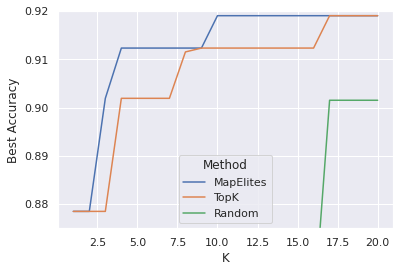

In [204]:
import seaborn as sns
import pandas as pd
sns.set_theme(style="darkgrid")

# Load an example dataset with long-form data
fmri = sns.load_dataset("fmri")

max_range = 20
a = [max(map_elites_list[:i]) for i in range(1, max_range+1)]
b = [max(topk_list[:i]) for i in range(1, max_range+1)]
c = [max(random[:i]) for i in range(1, max_range+1)]
data = pd.DataFrame({"K":range(1, max_range+1), "MapElites": a, "TopK": b, "Random": c})
print(pd.melt(data, 'K'))
print(a, b)

# Plot the responses for different events and regions
sns.set(rc={"figure.figsize":(6, 4)})
plt.ylim(0.875, 0.920)
x = sns.lineplot(x="K", y="Best Accuracy", hue="Method",
             #hue="region", style="event",
             data=pd.melt(data, 'K', var_name='Method', value_name='Best Accuracy'))
x.get_figure().savefig('comapre.png', dpi=400)

In [ ]:
m = EliteMatrix.load('nasbench_gt_FashionMNIST.npy')
budget = 10
ALPHA1 = 2
ALPHA2 = 2
# do initialization
# for idx, x in m.iter():
#     m.elites['new_metric'] = m.elites['validation_accuracy']

sample_list = []
moving_average = []
cur_acc_map = m.get_performance(key='validation_accuracy')
average_performance = np.mean(cur_acc_map)
for i in range(budget):
    pm = np.where(cur_acc_map == np.amax(cur_acc_map))
    # print(pm)
    cur_idx = tuple(np.array(pm).flatten().tolist())
    # print(idx)
    performance = m.get_performance(key='FashionMNIST')[cur_idx]
    moving_average.append(performance)
    sample_list.append((m.elites[cur_idx], performance, cur_idx))
    print(f"Iter {i}: {performance} {cur_idx} {np.mean(moving_average)}")
    cur_acc_map = m.get_performance(key='validation_accuracy')
    for elite, performance, idx in sample_list:
        # print(performance, np.mean(moving_average))
        # print(idx, performance)
        supress_ratio = performance / np.mean(moving_average)
        if supress_ratio > 1:
            ALPHA = ALPHA1
        else:
            ALPHA = ALPHA2
        # for dx, dy in [(0, -1), (0, 1), (1, 0), (-1, 0)]:
        for dx in [-1, 0, 1]:
            for dy in [-1, 0, 1]:
                for dz in [-1, 0, 1]:
                    x = dx + idx[0]
                    y = dy + idx[1]
                    z = dz + idx[2]
                    if x >=0 and x < cur_acc_map.shape[0] and y >=0 and y < cur_acc_map.shape[1]: 
                        # print(x, y, z, cur_acc_map[x, y, z] , '*' , (1 - supress_ratio ** ALPHA), " -> ", end="")
                        cur_acc_map[x, y, z] = cur_acc_map[x, y, z] - average_performance * (1 - supress_ratio ** ALPHA)
                        # print(cur_acc_map[x, y, z])
        cur_acc_map[idx] = 0


In [138]:
m = EliteMatrix.load('nasbench_gt_FashionMNIST.npy')
budget = 80
for idx, x in m.sorted_iter():
    print(x['validation_accuracy'], x['FashionMNIST'], idx)
    budget = budget - 1
    if budget <= 0:
        break

[0.9505542318026224, 0.9475828011830648, 0.9473824898401896, 0.9472489356994629, 0.9471821586290995, 0.947082002957662, 0.9465811848640442, 0.9460803866386414, 0.9460136294364929, 0.945846696694692, 0.945846696694692, 0.9455795884132385, 0.9455795884132385, 0.9453792770703634, 0.9453125, 0.9452791213989258, 0.9451789657274882, 0.9451789458592733, 0.9451455672581991, 0.9451121687889099, 0.944945236047109, 0.944778323173523, 0.9445779919624329, 0.9443109035491943, 0.9442441264788309, 0.9442441066106161, 0.9442107280095419, 0.9441773295402527, 0.9441105723381042, 0.94407719373703, 0.94407719373703, 0.9440437952677408, 0.9439436395963033, 0.9439102411270142, 0.9437433083852133, 0.9436765511830648, 0.9436097542444865, 0.943542997042338, 0.9434094627698263, 0.9433426856994629, 0.9432425300280253, 0.943209151426951, 0.9432091315587362, 0.9430755972862244, 0.943008820215861, 0.9429420431454977, 0.9427083333333334, 0.9427083333333334, 0.9426415761311849, 0.9425747791926066, 0.9425413807233175, 

Iter 0: 0.9075000286102295 (3, 4, 3, 0) 0.9075000286102295
[0.9451121687889099, 0.9451455672581991, 0.9451789458592733, 0.9451789657274882, 0.9452791213989258, 0.9453125, 0.9453792770703634, 0.9455795884132385, 0.9455795884132385, 0.945846696694692, 0.945846696694692, 0.9460136294364929, 0.9460803866386414, 0.9465811848640442, 0.947082002957662, 0.9471821586290995, 0.9472489356994629, 0.9473824898401896, 0.9475828011830648, 0.9505542318026224]


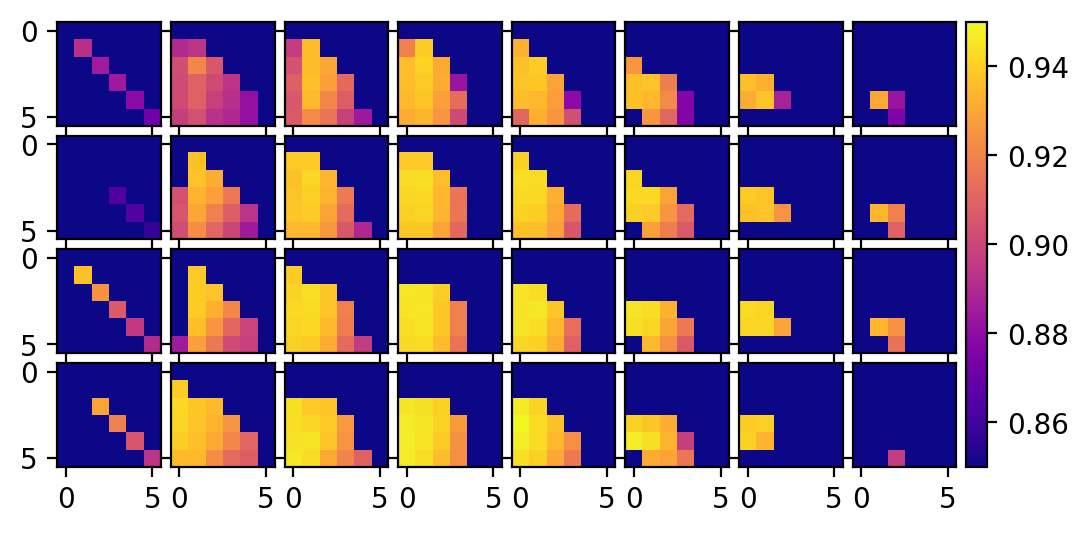

Iter 1: 0.8765000104904175 (3, 4, 4, 0) 0.8920000195503235
[0.944945236047109, 0.9451121687889099, 0.9451455672581991, 0.9451789458592733, 0.9451789657274882, 0.9452791213989258, 0.9453125, 0.9453792770703634, 0.9455795884132385, 0.9455795884132385, 0.945846696694692, 0.945846696694692, 0.9460136294364929, 0.9460803866386414, 0.9465811848640442, 0.947082002957662, 0.9471821586290995, 0.9472489356994629, 0.9473824898401896, 0.9475828011830648]


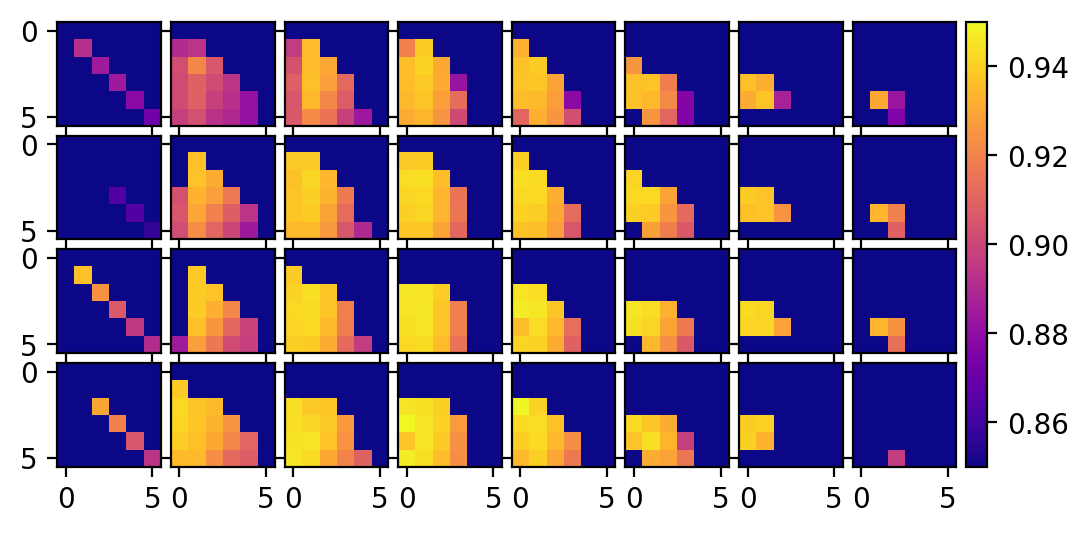

Iter 2: 0.8356999754905701 (3, 3, 3, 0) 0.8732333381970724
[0.9442441264788309, 0.9443109035491943, 0.9445779919624329, 0.944945236047109, 0.9451121687889099, 0.9451455672581991, 0.9451789458592733, 0.9452791213989258, 0.9453125, 0.9453792770703634, 0.9455795884132385, 0.9455795884132385, 0.945846696694692, 0.945846696694692, 0.9460136294364929, 0.9460803866386414, 0.9471821586290995, 0.9471944530068127, 0.948997314697334, 0.9496650655327527]


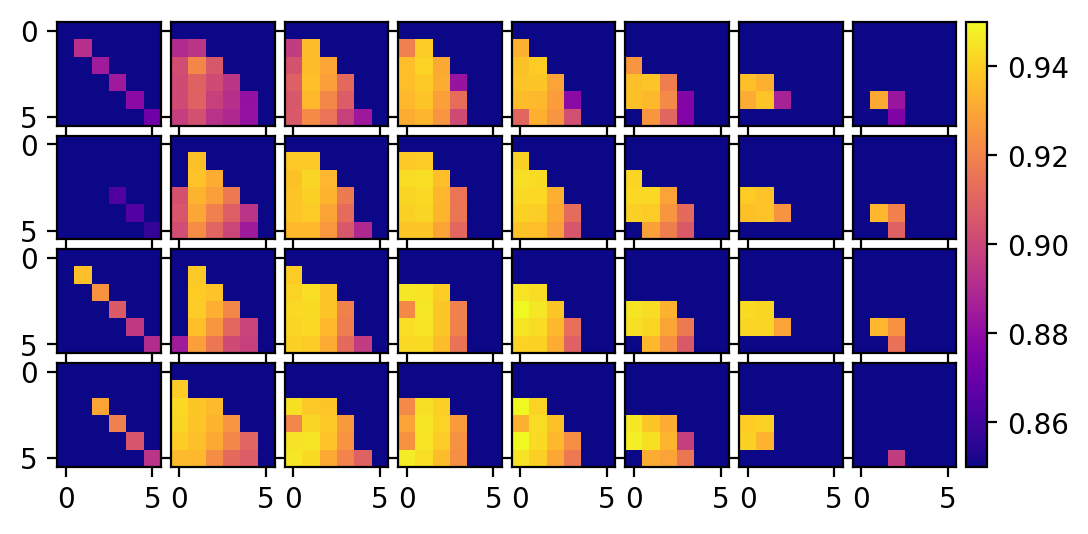

Iter 3: 0.8632000088691711 (3, 4, 2, 0) 0.870725005865097
[0.9443109035491943, 0.9445779919624329, 0.9447326400559052, 0.944945236047109, 0.9451121687889099, 0.9451455672581991, 0.9452791213989258, 0.9453125, 0.9453792770703634, 0.9455795884132385, 0.9457008777738515, 0.945846696694692, 0.945846696694692, 0.9460136294364929, 0.9460803866386414, 0.9463325829025799, 0.9471821586290995, 0.9476039150040253, 0.9502054543015057, 0.952008315992027]


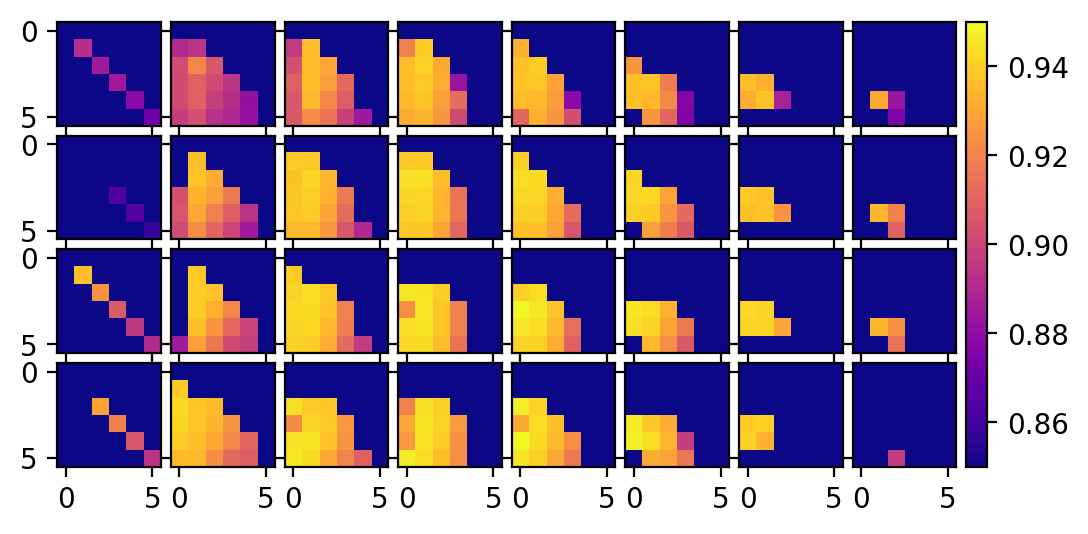

Iter 4: 0.8991000056266785 (2, 4, 3, 0) 0.8764000058174133
[0.9442441066106161, 0.9442441264788309, 0.9443109035491943, 0.9445779919624329, 0.944945236047109, 0.9451353849902283, 0.9451455672581991, 0.9452791213989258, 0.9453125, 0.9453792770703634, 0.9455795884132385, 0.945846696694692, 0.945846696694692, 0.9460136294364929, 0.9460803866386414, 0.9461036227081746, 0.9467423880862225, 0.9471821586290995, 0.9480066599383484, 0.9506152594851482]


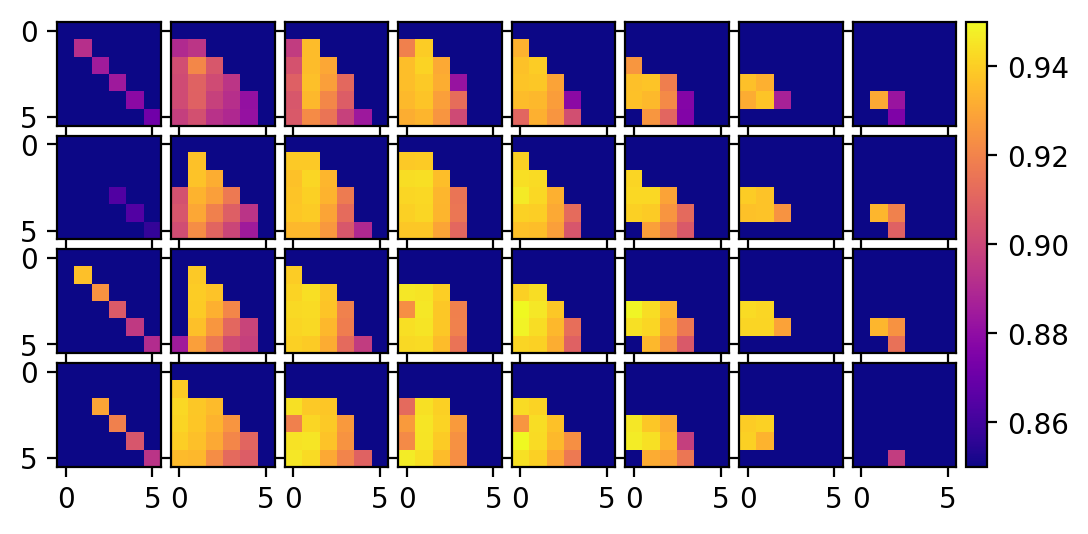

Iter 5: 0.8083000183105469 (2, 5, 3, 0) 0.8650500078996023
[0.9442266623167945, 0.9442441066106161, 0.9442441264788309, 0.9443109035491943, 0.9445779919624329, 0.944945236047109, 0.9451455672581991, 0.9452791213989258, 0.9453125, 0.9453792770703634, 0.945817735209601, 0.945846696694692, 0.945846696694692, 0.9460136294364929, 0.9460803866386414, 0.946535942026251, 0.9470979372649146, 0.9471821586290995, 0.9487887989154942, 0.9491734872939919]


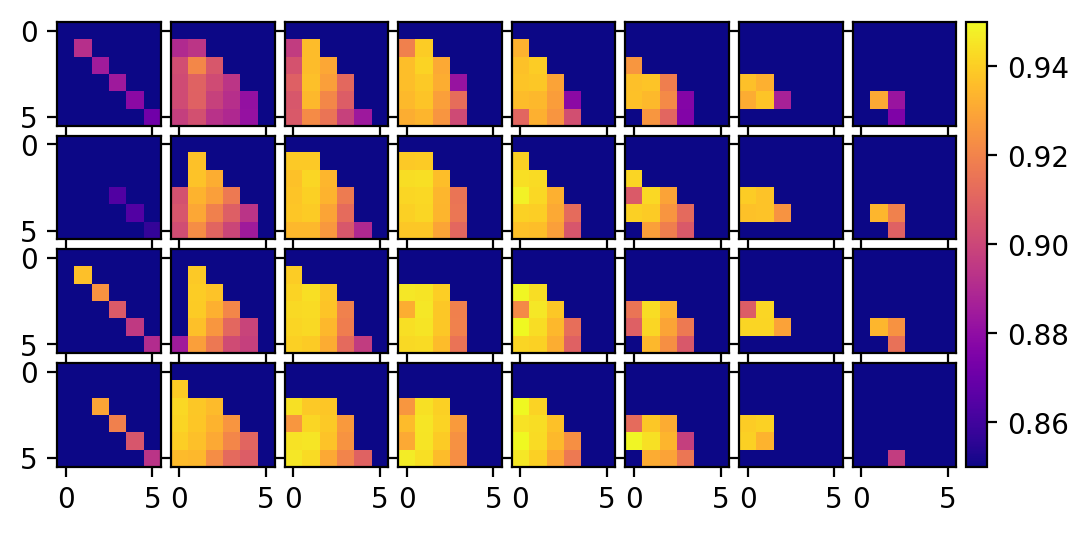

Iter 6: 0.6550999879837036 (2, 4, 4, 0) 0.8350571479116168
[0.94407719373703, 0.9441773295402527, 0.9442441066106161, 0.9443109035491943, 0.9445779919624329, 0.944945236047109, 0.9451455672581991, 0.9452791213989258, 0.9453125, 0.9453792770703634, 0.945846696694692, 0.945846696694692, 0.9460136294364929, 0.9460530349980845, 0.9460803866386414, 0.9471821586290995, 0.9483857107829513, 0.9489243099462046, 0.9493625263967612, 0.9524649403534844]


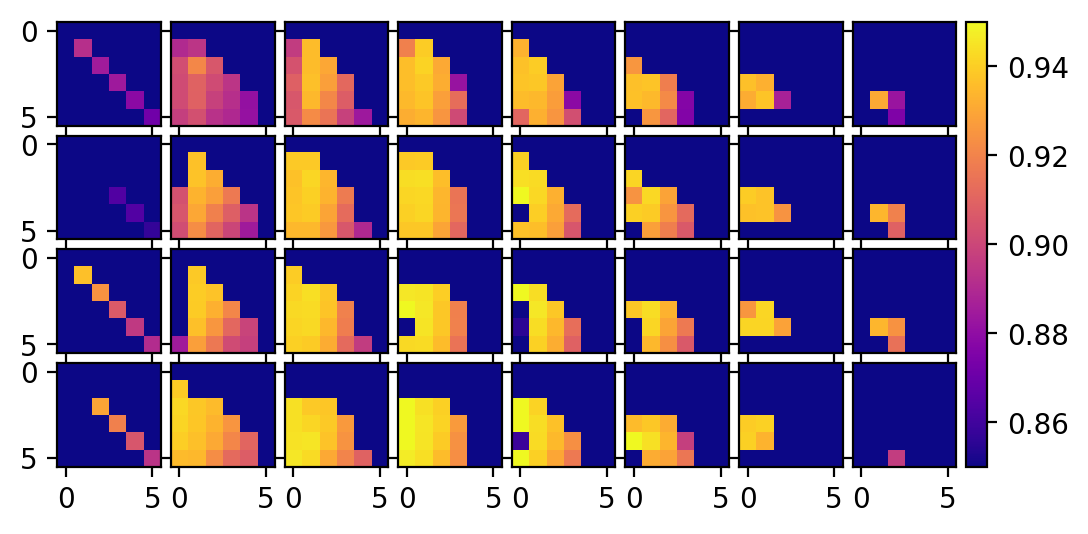

Iter 7: 0.9114999771118164 (2, 4, 2, 0) 0.8446125015616417
[0.9442441066106161, 0.9443109035491943, 0.9445779919624329, 0.944945236047109, 0.9451455672581991, 0.9452791213989258, 0.9453125, 0.9453792770703634, 0.945846696694692, 0.945846696694692, 0.9460136294364929, 0.9460803866386414, 0.9471821586290995, 0.9503543699431014, 0.9510572566562175, 0.9534540371818544, 0.9539285316043377, 0.9543364971858022, 0.9557984185945669, 0.9602914656561926]


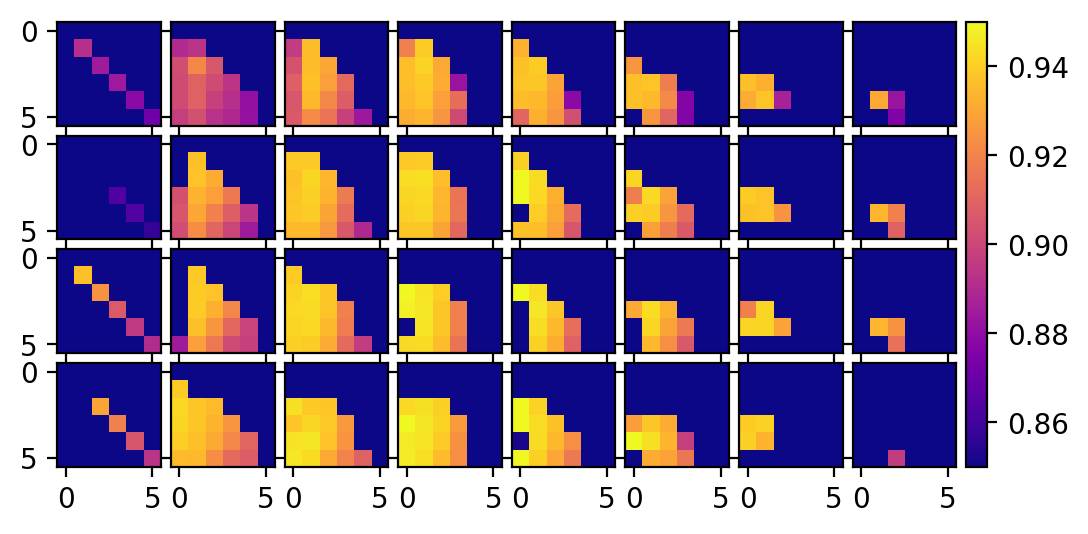

Iter 8: 0.7333999872207642 (2, 3, 2, 0) 0.8322555555237664
[0.9441773295402527, 0.9442441066106161, 0.9443109035491943, 0.9445779919624329, 0.944945236047109, 0.9451455672581991, 0.9452791213989258, 0.9453125, 0.9453792770703634, 0.945846696694692, 0.945846696694692, 0.9460803866386414, 0.9467426485318305, 0.9471821586290995, 0.9481837767106027, 0.9494340704359484, 0.9518100577315927, 0.9523053453840685, 0.9548920865437428, 0.9568619207124949]


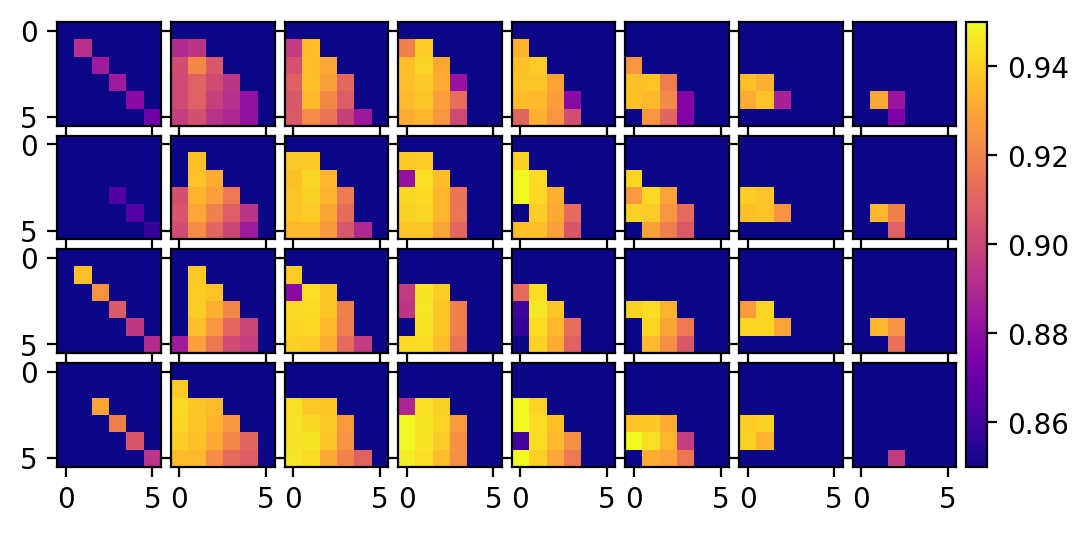

Iter 9: 0.847599983215332 (1, 4, 2, 0) 0.833789998292923
[0.94407719373703, 0.9441773295402527, 0.9442441066106161, 0.9443109035491943, 0.9445779919624329, 0.9446879213083654, 0.944945236047109, 0.9451455672581991, 0.9452791213989258, 0.9453125, 0.9453792770703634, 0.945846696694692, 0.945846696694692, 0.9460803866386414, 0.9471821586290995, 0.9515384601104614, 0.9539414049159403, 0.9544097350585815, 0.9552875709113703, 0.9570380806773918]


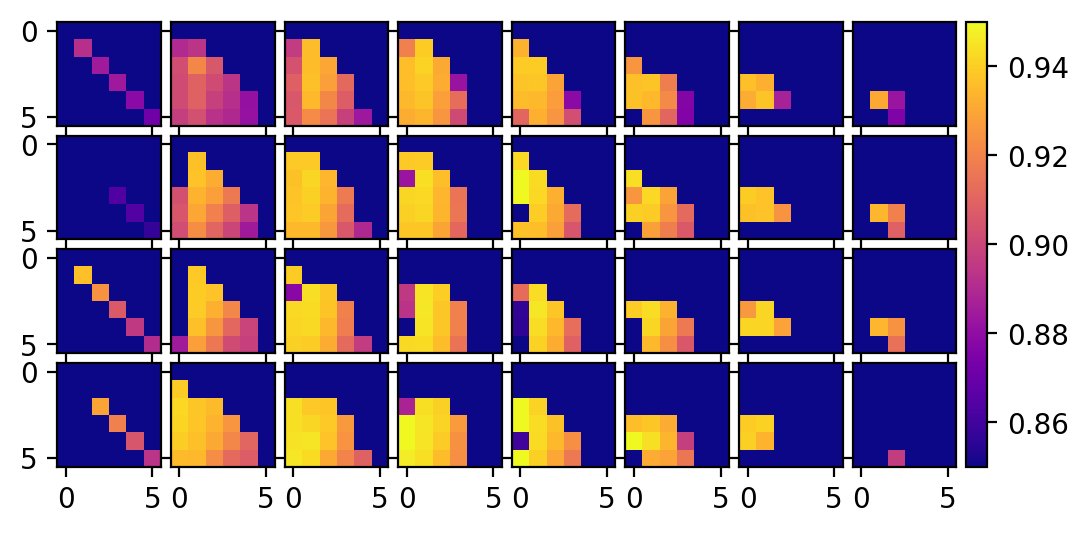

In [163]:
m = EliteMatrix.load('nasbench_gt_FashionMNIST.npy')
budget = 10
ALPHA1 = 0.5
ALPHA2 = 2
# do initialization
# for idx, x in m.iter():
#     m.elites['new_metric'] = m.elites['validation_accuracy']

sample_list = []
moving_average = []
cur_acc_map = m.get_performance(key='validation_accuracy')
average_performance = np.mean(cur_acc_map)
for i in range(budget):
    pm = np.where(cur_acc_map == np.amax(cur_acc_map))
    # print(pm)
    cur_idx = tuple(np.array(pm).flatten().tolist())
    # print(idx)
    performance = m.get_performance(key='FashionMNIST')[cur_idx]
    moving_average.append(performance)
    sample_list.append((m.elites[cur_idx], performance, cur_idx))
    print(f"Iter {i}: {performance} {cur_idx} {np.mean(moving_average)}")
    print(sorted(cur_acc_map.flatten().tolist())[-20:])
    cur_acc_map = m.get_performance(key='validation_accuracy')
    for elite, performance, idx in sample_list:
        # print(performance, np.mean(moving_average))
        # print(idx, performance)
        supress_ratio = performance / np.mean(moving_average)
        if supress_ratio > 1:
            ALPHA = ALPHA1
        else:
            ALPHA = ALPHA2
        # for dx, dy in [(0, -1), (0, 1), (1, 0), (-1, 0)]:
        for dx in [-1, 0, 1]:
            for dy in [-1, 0, 1]:
                for dz in [-1, 0, 1]:
                    if abs(dx) + abs(dy) + abs(dz) > 1:
                        continue
                    x = dx + idx[0]
                    y = dy + idx[1]
                    z = dz + idx[2]
                    j = idx[3]
                    if x >=0 and x < cur_acc_map.shape[0] and y >=0 and y < cur_acc_map.shape[1]: 
                        # print(x, y, z, cur_acc_map[x, y, z] , '*' , (1 - supress_ratio ** ALPHA), " -> ", end="")
                        # print(average_performance * (1 - supress_ratio ** ALPHA))
                        cur_acc_map[x, y, z, j] = cur_acc_map[x, y, z, j] - average_performance * (1 - supress_ratio ** ALPHA)
                        # print(cur_acc_map[x, y, z])
    plot_4d_in_2d(cur_acc_map, save=True, save_name=f'./vis/4d_{i}', vmin=0.85, vmax=0.95)
    for elite, performance, idx in sample_list:
        cur_acc_map[idx] = 0
    # plot_4d_in_2d(cur_acc_map)